In [1]:
import numpy as np
from astropy.io import fits
from scipy.interpolate import UnivariateSpline
import os

import apogee_tools as ap

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [108]:
spec = ap.Apogee(id='2M19213157+4317347', type='aspcap')
spec = ap.rvShiftSpec(spec, rv=-80)
spec.name = '2M19213157+4317347'

interp, local_min, local_max = ap.splineInterpolate(spec)
min_lines = {'min':np.array(local_min)}

apogee_species = np.array(ap.listSpecies('APOGEE_ATOMS') + ap.listSpecies('APOGEE_MOLEC'))
souto_species = np.array(ap.listSpecies('SOUTO'))

fe = ['Fe I', 'FE I'] 
cr = ['Cr I', 'CR I']
ti = ['Ti I', 'TI I']
mn = ['Mn I', 'MN I']
mg = ['Mg I', 'MG I']
ca = ['Ca I', 'CA I']
si = ['Si I', 'SI I']
k  = ['K I', 'K I']
oh = ['OH', 'OH']

![](../images/souto_spec1.png)

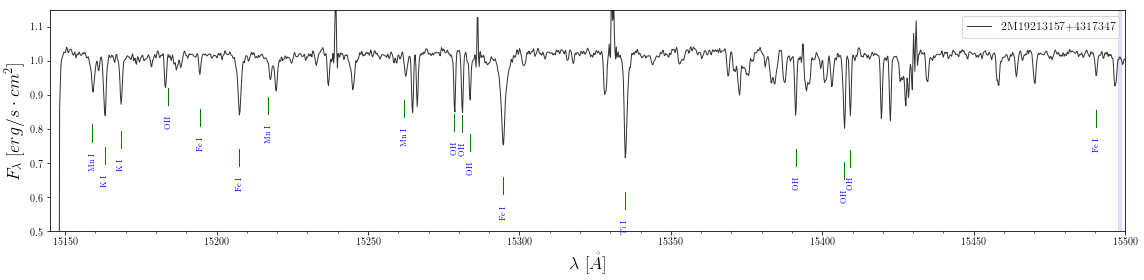

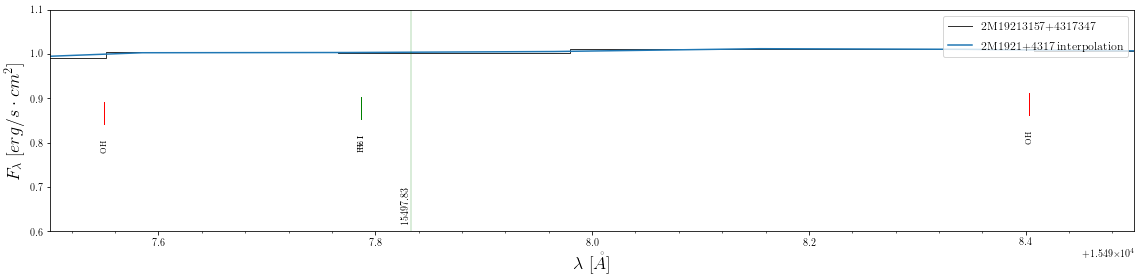

[] [15497.787] []
[15497.83269891] 

15497.787,Fe I,15497.833,NIST,15497.5,15498.5


In [107]:
zoom = [[15497.5,15498.5]]

search = fe

lines = np.array(local_min)
range_indices = np.where((lines > zoom[0][0]) & (lines < zoom[0][1]))[0]
min_lines = np.array(lines)[range_indices]

species = cr + fe + ti + mn + mg + ca + k + oh
spec.plot(items=['spec', 'lines'], xrange=[15145,15500], yrange=[.5,1.15], highlight=zoom)

lines1 = ap.searchLines(species=species, libraries=['APOGEE_ATOMS', 'APOGEE_MOLEC'], \
                        range=zoom[0], report=False)
lines2 = ap.searchLines(species=species, libraries=['NIST'], range=zoom[0], report=False)
lines3 = ap.searchLines(species=species, libraries=['SOUTO'], range=zoom[0], report=False)

spec.plot(items=['spec'], xrange=zoom[0], yrange=[.6,1.1], line_lists=[lines1, lines2, lines3], \
          line_style='short', style='step', objects=[interp], vert_lines=[min_lines])

found1 = lines1[search[1]]
found2 = lines2[search[0]]
found3 = lines3[search[0]]

print(found1, found2, found3)
print(min_lines, '\n')

i = 1
j = 0
if i == 0:   
    print(('{},{},{},{},{},{}').format(found1[j], search[0], round(min_lines[0],3), 'APOGEE', zoom[0][0], zoom[0][1]))
elif i == 1:
    print(('{},{},{},{},{},{}').format(found2[j], search[0], round(min_lines[0],3), 'NIST', zoom[0][0], zoom[0][1]))

![](../images/souto_spec2.png)

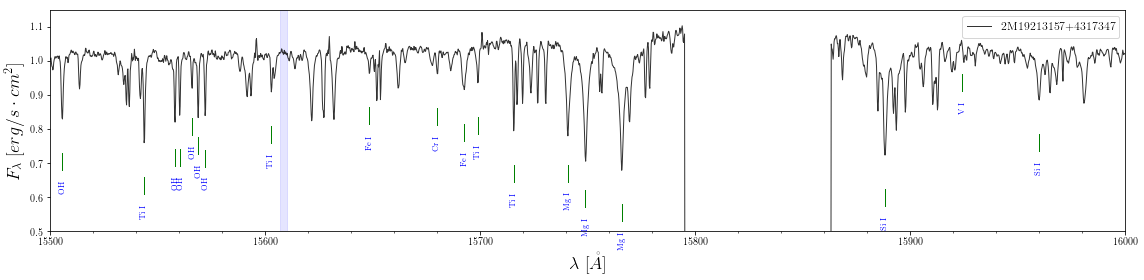

In [ ]:
zoom = [[15603,156]]

search = oh

lines = np.array(local_min)
range_indices = np.where((lines > zoom[0][0]) & (lines < zoom[0][1]))[0]
min_lines = np.array(lines)[range_indices]

species = cr + fe + ti + mn + mg + ca + si + k + oh
spec.plot(items=['spec', 'lines'], xrange=[15500,16000], yrange=[.5,1.15], highlight=zoom)

lines1 = ap.searchLines(species=species, libraries=['APOGEE_ATOMS', 'APOGEE_MOLEC'], \
                        range=zoom[0], report=False)
lines2 = ap.searchLines(species=species, libraries=['NIST'], range=zoom[0], report=False)
lines3 = ap.searchLines(species=species, libraries=['SOUTO'], range=zoom[0], report=False)

spec.plot(items=['spec'], xrange=zoom[0], yrange=[.6,1.1], line_lists=[lines1, lines2, lines3], \
          line_style='short', style='step', objects=[interp], vert_lines=[min_lines])

found1 = lines1[search[1]]
found2 = lines2[search[0]]
found3 = lines3[search[0]]

print(found1, found2, found3)
print(min_lines, '\n')

i = 0
j = 3
if i == 0:   
    print(('{},{},{},{},{},{}').format(found1[j], search[0], round(min_lines[0],3), 'APOGEE', zoom[0][0], zoom[0][1]))
elif i == 1:
    print(('{},{},{},{},{},{}').format(found2[j], search[0], round(min_lines[0],3), 'NIST', zoom[0][0], zoom[0][1]))

![](../images/souto_spec3.png)

![](../images/souto_spec4.png)

In [6]:
data = ap.Apogee(id='2M03425325+2326495', type='aspcap')
data = ap.rvShiftSpec(data, rv=-80)

In [10]:
name = '2M03425325+2326495'

'2M0342+2326'